In [1]:
import mysql.connector
import pandas as pd
from sklearn import tree
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1', database='learn')

In [3]:
cursor = cnx.cursor()
SQL_Query = pd.read_sql_query(
'''select
*
from FinalProject_dp''', cnx)

In [4]:
df = pd.DataFrame(SQL_Query, columns=['CarName', 'CarYear',
                                      'CarUsage', 'CarPrice'])

In [5]:
def boxplot_sorted(df, by, column, rot=0):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()
    return df2[meds.index]
df_2 = boxplot_sorted(df, by = ['CarName'], column = 'CarPrice')

In [6]:
x = 0
car2num= dict()
for col in df_2.columns:
    car2num[col] = x
    df=df.replace(to_replace=col, value=x, inplace=False,
                  limit=None, regex=False, method='pad')
    x += 1

In [7]:
car2num

{'Buick Century': 0,
 'Pontiac Bonneville': 1,
 'Chevrolet S-10': 2,
 'INFINITI I35': 3,
 'Buick LeSabre': 4,
 'Dodge Intrepid': 5,
 'Cadillac DeVille': 6,
 'Ford Escort': 7,
 'Saturn VUE': 8,
 'Chevrolet HHR': 9,
 'Chrysler 300M': 10,
 'Saturn Outlook': 11,
 'Volvo S80': 12,
 'Dodge Caravan': 13,
 'Chevrolet Aveo': 14,
 'Ford Police Interceptor': 15,
 'Chevrolet Trailblazer': 16,
 'Isuzu Ascender': 17,
 'INFINITI I30': 18,
 'Jeep Commander': 19,
 'Pontiac Vibe': 20,
 'Chrysler PT Cruiser': 21,
 'Dodge Avenger': 22,
 'Jeep Liberty': 23,
 'Volvo S40': 24,
 'Dodge Caliber': 25,
 'MINI Cooper': 26,
 'Mitsubishi Eclipse': 27,
 'Acura RL': 28,
 'Lincoln Town Car': 29,
 'FIAT 500': 30,
 'Mazda Mazda6': 31,
 'Buick Rendezvous': 32,
 'Dodge Stratus': 33,
 'Hyundai Entourage': 34,
 'Lexus GS': 35,
 'Ford Freestar Cargo Van': 36,
 'Buick Regal': 37,
 'Acura TL': 38,
 'Toyota Matrix': 39,
 'Cadillac DTS': 40,
 'Chevrolet Spark': 41,
 'Scion xB': 42,
 'Honda Insight': 43,
 'Isuzu Trooper': 44,
 'R

In [8]:
X = df[['CarName', 'CarYear', 'CarUsage']]
y = df[['CarPrice']]

<AxesSubplot:>

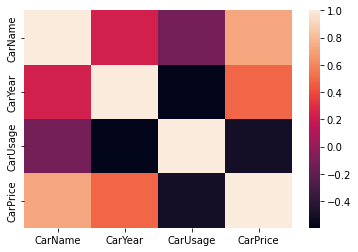

In [9]:
sns.heatmap(df.corr())

In [10]:
X

,CarName,CarYear,CarUsage
0,287,2018,59985
1,184,2019,56973
2,100,2019,49959
3,290,2018,195205
4,214,2019,115385
...,...,...,...
9988,212,2018,37759
9989,287,2018,123176
9990,125,2018,66141
9991,227,2019,54254


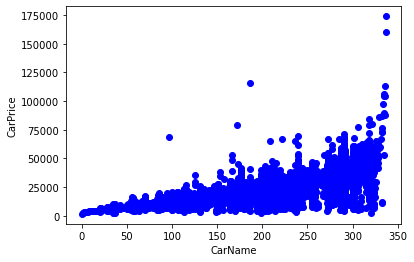

In [11]:
plt.scatter(df.CarName, df.CarPrice,  color='blue')
plt.xlabel("CarName")
plt.ylabel("CarPrice")
plt.show()

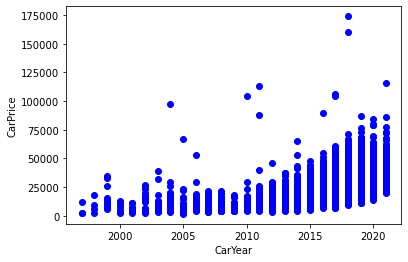

In [12]:
plt.scatter(df.CarYear, df.CarPrice,  color='blue')
plt.xlabel("CarYear")
plt.ylabel("CarPrice")
plt.show()

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = np.asanyarray(train[['CarName','CarYear','CarUsage']])
y = np.asanyarray(train[['CarPrice']])
regr.fit (X, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 1.14350299e+02  4.69528919e+02 -1.01040718e-01]]


In [15]:
X_test = np.asanyarray(test[['CarName','CarYear','CarUsage']])
y_test = np.asanyarray(test[['CarPrice']])
y_pred = regr.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7376268752941226

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [18]:
Gboost=GradientBoostingRegressor()
Gboost.fit(X,y)

GradientBoostingRegressor()

In [21]:
y_pred = Gboost.predict(X_test)

In [22]:
r2_score(y_test, y_pred)

0.8674285869131482

In [23]:
X = np.asanyarray(df[['CarName','CarYear','CarUsage']])
y = np.asanyarray(df[['CarPrice']])

In [24]:
Gboost.fit(X, y)

GradientBoostingRegressor()

In [28]:
q = True 
while q:   
    car = input("Enter Your Desired Car Name: ")
    if car in car2num:
        q = False
    else:
        print("Not supported try again please!!!")
        q1=input("Do you wnat to see the list of supported cars?(y/n): ").lower()
        ch1 = True
        while ch1:
            if q1 == 'y' or q1 == 'n':
                ch1 = False
            else:
                q1=input("(y/n): ")
        if q1 == 'y':
            for key in car2num:
                print (key)
numcar = car2num[car]
year = int(input("Enter Your Car Built Year: "))
usage = int(input("Enter Your Car Usage Per Mile: "))

new_data = [[numcar, year, usage]]
answer = Gboost.predict(new_data)
answer = int(answer)
print(f"The Car Price Is About {answer}$")

Enter Your Desired Car Name: Benz
Not supported try again please!!!
Do you wnat to see the list of supported cars?(y/n): y
Buick Century
Pontiac Bonneville
Chevrolet S-10
INFINITI I35
Buick LeSabre
Dodge Intrepid
Cadillac DeVille
Ford Escort
Saturn VUE
Chevrolet HHR
Chrysler 300M
Saturn Outlook
Volvo S80
Dodge Caravan
Chevrolet Aveo
Ford Police Interceptor
Chevrolet Trailblazer
Isuzu Ascender
INFINITI I30
Jeep Commander
Pontiac Vibe
Chrysler PT Cruiser
Dodge Avenger
Jeep Liberty
Volvo S40
Dodge Caliber
MINI Cooper
Mitsubishi Eclipse
Acura RL
Lincoln Town Car
FIAT 500
Mazda Mazda6
Buick Rendezvous
Dodge Stratus
Hyundai Entourage
Lexus GS
Ford Freestar Cargo Van
Buick Regal
Acura TL
Toyota Matrix
Cadillac DTS
Chevrolet Spark
Scion xB
Honda Insight
Isuzu Trooper
Ram Cargo Van
Mitsubishi Mirage
Mitsubishi Diamante
Chevrolet Impala Police
Lincoln Navigator
Toyota Sequoia
Mercury Grand Marquis
Chevrolet Impala Limited Police
Nissan LEAF
Volkswagen Touareg
INFINITI G
Dodge Ram 1500
Toyota Pri